In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from IPython.display import display
pd.options.display.max_columns = None

# Regression - Interpretation

## Exercise 1: Regressive Tennis T-Test

Use a linear regression and statsmodels to run a t-test on whether Federer scores more points than his opponents in the `tennis.csv` dataset.

Give a one-paragraph interpretation of the coefficient, and the meaning of the p-value. 

Also answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

<font color='red'>A: If given the linear comparison of Federer's points to opponents points, there is a very high probability that Federer scores more points compared to opponents. The coefficient shows that for each point player 2 makes, Federer is likely to make a theoretical 0.82 points and the p-value is below 0.05 so this is a significant effect. The intercept must be included to absorb bias and the coefficient of the intercept shows that Federer starts a match with an average 26.3 point advantage. Given the rate of change of 0.82, the model predicts that if the game goes on long enough player 2 will come out with more points.</font>

In [2]:
# exercise 1
tennis = pd.read_csv('../data/tennis.csv').dropna()
X_t = sm.add_constant(tennis['player2 total points won'])
y_t = tennis['player1 total points won']

est_t = sm.OLS(y_t, X_t).fit()

est_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                       0.794
Model:                                  OLS   Adj. R-squared:                  0.794
Method:                       Least Squares   F-statistic:                     3903.
Date:                      Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                              15:48:18   Log-Likelihood:                -4016.0
No. Observations:                      1016   AIC:                             8036.
Df Residuals:                          1014   BIC:                             8046.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       26.3403      1.047     25.160      0.000      24.286      28.395
player2 total points won     0.8200      0.013     62.477      0.000       0.794       0.846
==============================================================================
Omnibus:                       76.898   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.953
Skew:                          -0.634   Prob(JB):                     7.26e-23
Kurtosis:                       3.894   Cond. No.                         211.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
# No constant
tennis = pd.read_csv('../data/tennis.csv').dropna()
X_t = tennis['player2 total points won']
y_t = tennis['player1 total points won']

est_t = sm.OLS(y_t, X_t).fit()

est_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player1 total points won   R-squared (uncentered):                   0.969
Model:                                  OLS   Adj. R-squared (uncentered):              0.969
Method:                       Least Squares   F-statistic:                          3.173e+04
Date:                      Mon, 20 Feb 2023   Prob (F-statistic):                        0.00
Time:                              15:48:57   Log-Likelihood:                         -4262.4
No. Observations:                      1016   AIC:                                      8527.
Df Residuals:                          1015   BIC:                                      8532.
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
player2 total points won     1.1257      0.006    178.124      0.000       1.113       1.138
==============================================================================
Omnibus:                       71.489   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.456
Skew:                          -0.707   Prob(JB):                     2.78e-19
Kurtosis:                       3.148   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercise 2: College admissions

Using the `college.csv` dataset, answer the following:

1. Do private schools see more admissions overall? Hint: use a binary explanatory variable for `Private` <font color='red'>A: Private schools generally have fewer admissions compared to public.</font>

2. Is the relation between `Top10perc` and `Top25perc` best fit using a model with only one variable, or one variable and a polynomial of degree 2? Is a constant term useful? How would you select for the best of these model specifications? <font color='red'>A: A constant is necessary here to get the best fit. The $R^2$ and AIC is better for the polynomial regression so would be a better model for this comparison.</font>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Accept   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     226.1
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           4.95e-45
Time:                        15:49:15   Log-Likelihood:                -7066.5
No. Observations:                 777   AIC:                         1.414e+04
Df Residuals:                     775   BIC:                         1.415e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3919.2877    148.212     26.444      0.000    3628.343    4210.233
Private    -2613.5851    173.808    -15.037      0.000   -2954.776   -2272.394
==============================================================================
Omnibus:                      603.909   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15927.055
Skew:                           3.268   Prob(JB):                         0.00
Kurtosis:                      24.195   Cond. No.                         3.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

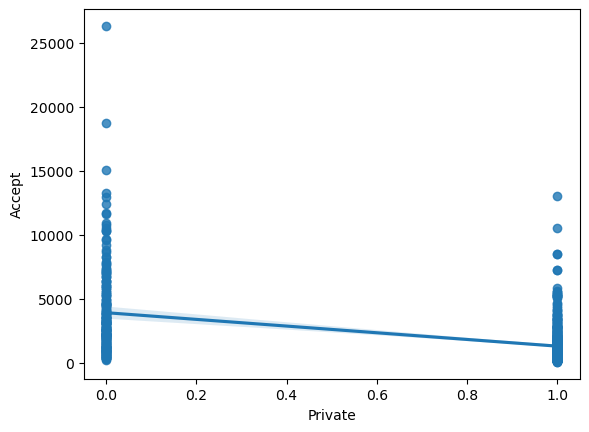

In [4]:
# exercise 2

college = pd.read_csv('../data/college.csv')
college.Private = college.Private.map({'Yes': 1, 'No': 0})

X_p = sm.add_constant(college.Private)
y_p = college.Accept

est_p = sm.OLS(y_p, X_p).fit()

sns.regplot(x=X_p.iloc[:,1], y=y_p)

est_p.summary()

                            OLS Regression Results                            
Dep. Variable:              Top10perc   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     3018.
Date:                Mon, 20 Feb 2023   Prob (F-statistic):          1.87e-269
Time:                        15:49:18   Log-Likelihood:                -2715.2
No. Observations:                 777   AIC:                             5434.
Df Residuals:                     775   BIC:                             5444.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.7725      0.856    -19.588      0.0

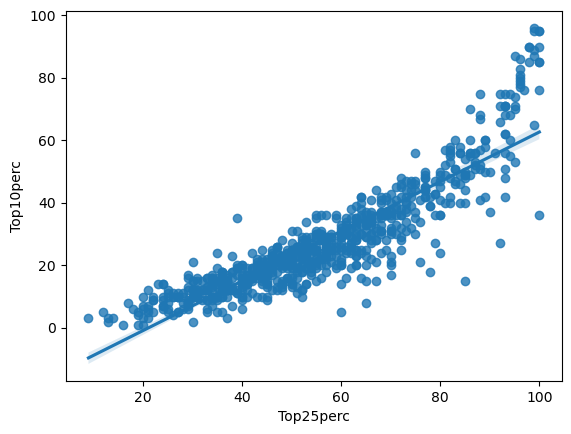

In [5]:
X_p2 = college.Top10perc
y_p2 = college.Top25perc

est_p2 = smf.ols(formula='Top10perc ~ Top25perc', data=college).fit()
est_p3 = smf.ols(formula='Top10perc ~ Top25perc + I(Top25perc**2)', data=college).fit()

sns.regplot(x=college.Top25perc, y=college.Top10perc)

print(est_p2.summary())
print(est_p3.summary())

## Exercise 3: Auto prediction

Using the `auto.csv` dataset, perform a simple linear regression with `mpg` as the response variable and horsepower as the predictor. Answer the following:

 i. Is there a relationship between the predictor and the response? <font color="red">A: There is a likely relationship given the P values but the $R^2$ is not very high.</font>
 
 ii. How strong is the relationship between the predictor and the response? <font color="red">A: The relationship is weak since the $R^2$ is only just above 0.6.</font>

 iii. Is the relationship between the predictor and the response positive or negative? <font color="red">A: it is a negative relationship so as horsepower increases mpg decreases.</font>

 iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ? <font color="red">A: The estimated mpg for 98 horsepower is 24.47mpg. the 95% CI is 23.97-24.96 and the PI is 14.81-34.12.</font>

 v. Make a regression plot the response and the predictor.

In [7]:
prediction.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           7.03e-81
Time:                        15:50:04   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

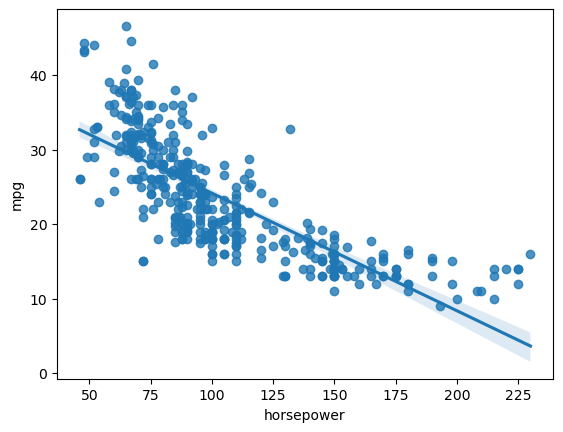

In [6]:
# exercise 3
auto = pd.read_csv('../data/auto.csv', delim_whitespace=True)[1:]
auto.drop(auto[auto.horsepower == '?'].index, inplace=True)
auto.mpg = auto.mpg.astype(float)
auto.horsepower = auto.horsepower.astype(float)

y_a = auto.mpg
X_a = auto.horsepower
X_a = sm.add_constant(X_a)

est_a = sm.OLS(y_a, X_a).fit()

sns.regplot(x=X_a.iloc[:,1], y=y_a)

prediction = est_a.get_prediction([1,98])

est_a.summary()

## Exercise 4: Auto Multiple Regression

Perform a multiple linear regression with `mpg` as the response and all other variables except name in `auto` as the predictors. Comment on the output:

i. Is there a relationship between the predictors and the response? <font color="red">A: There is a good relationship for most of the predictors except acceleration, horsepower and cylinders. </font> 

ii. Which predictors appear to have a statistically significant relationship to the response? <font color="red">A: Displacement, weight, year, and origin.</font>

iii. What does the coefficient for the year variable suggest? <font color="red">A: The comparitively large and positive coefficient means that as the year increases the mpg increases more than other predictors except origin.</font>

iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? <font color="red"> There is definitely room to improve the model since the residuals are not always evenly distributed. There is some heterscedasticity and nonlinearity with a few outliers in horsepower and acceleration.</font>

v. Is there heteroscedasticity in the fit? <font color="red">Based on the residuals, yes there is.</font>

In [8]:
# exercise 4

X_am = sm.add_constant(auto.iloc[:,1:8])

est_am = sm.OLS(y_a, X_am).fit(cov_type='HC2')

est_am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.5
Date:                Mon, 20 Feb 2023   Prob (F-statistic):          1.98e-139
Time:                        15:50:49   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.697     -3.666      0.000     -26.425      -8.012
cylinders       -0.4934      0.311     -1.586      0.113      -1.103       0.116
displacement     0.0199      0.008      2.401      0.016       0.004       0.036
horsepower      -0.0170      0.014     -1.208      0.227      -0.044       0.011
weight          -0.0065      0.001     -8.304      0.000      -0.008      -0.005
acceleration     0.0806      0.128      0.630      0.529      -0.170       0.331
year             0.7508      0.049     15.196      0.000       0.654       0.848
origin           1.4261      0.275      5.187      0.000       0.887       1.965
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

AxesSubplot(0.125,0.11;0.775x0.77)


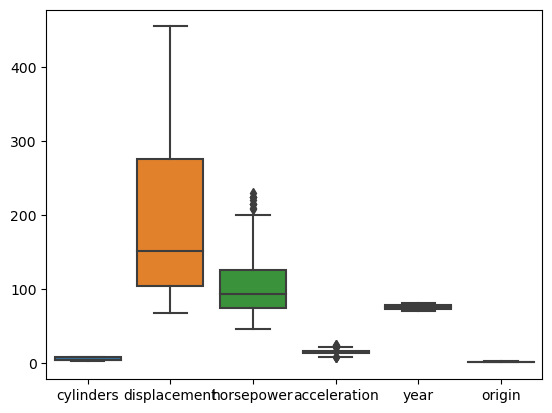

In [22]:
print(sns.boxplot(data=auto[['cylinders','displacement','horsepower','acceleration','year','origin']]))

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


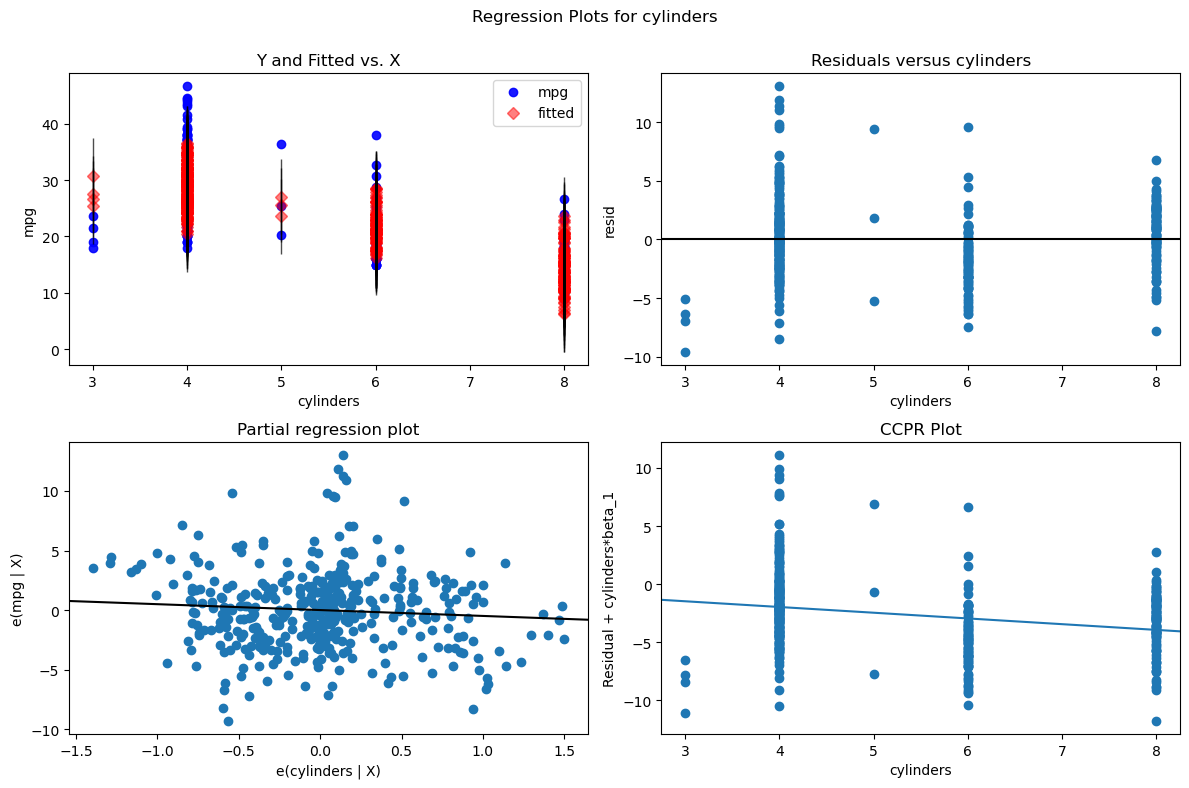

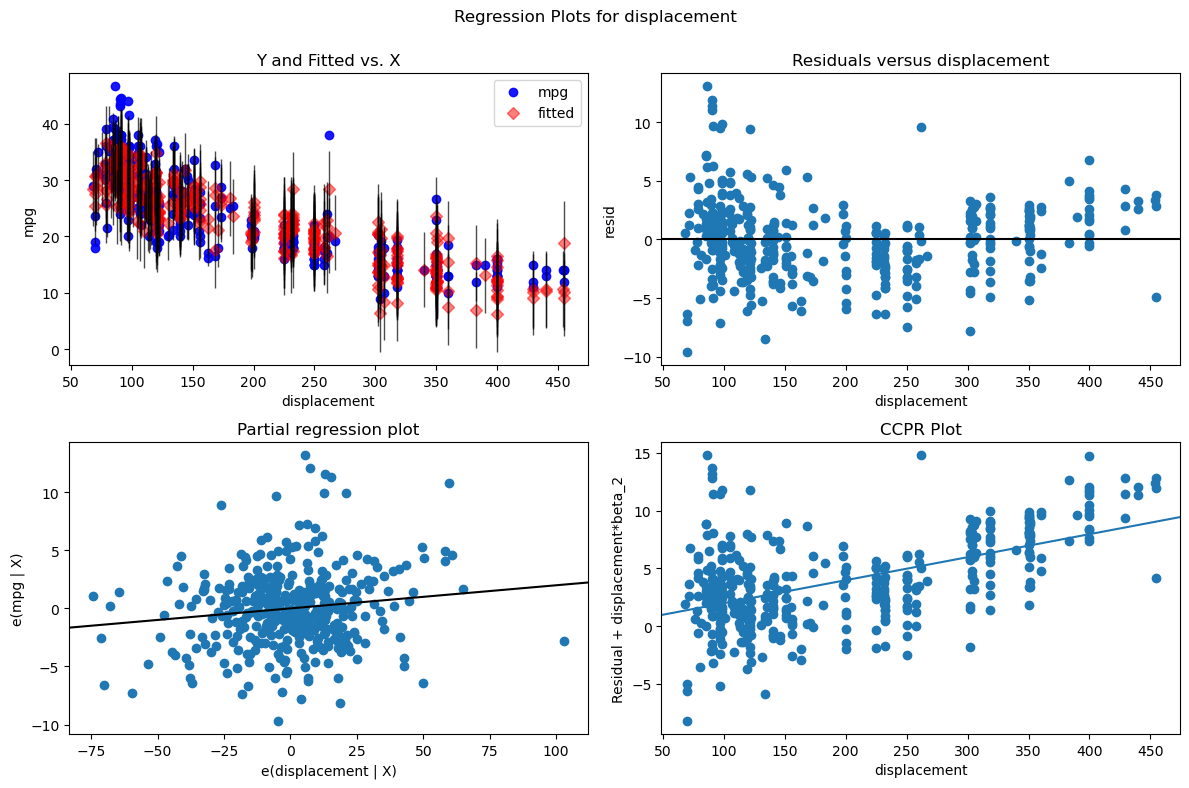

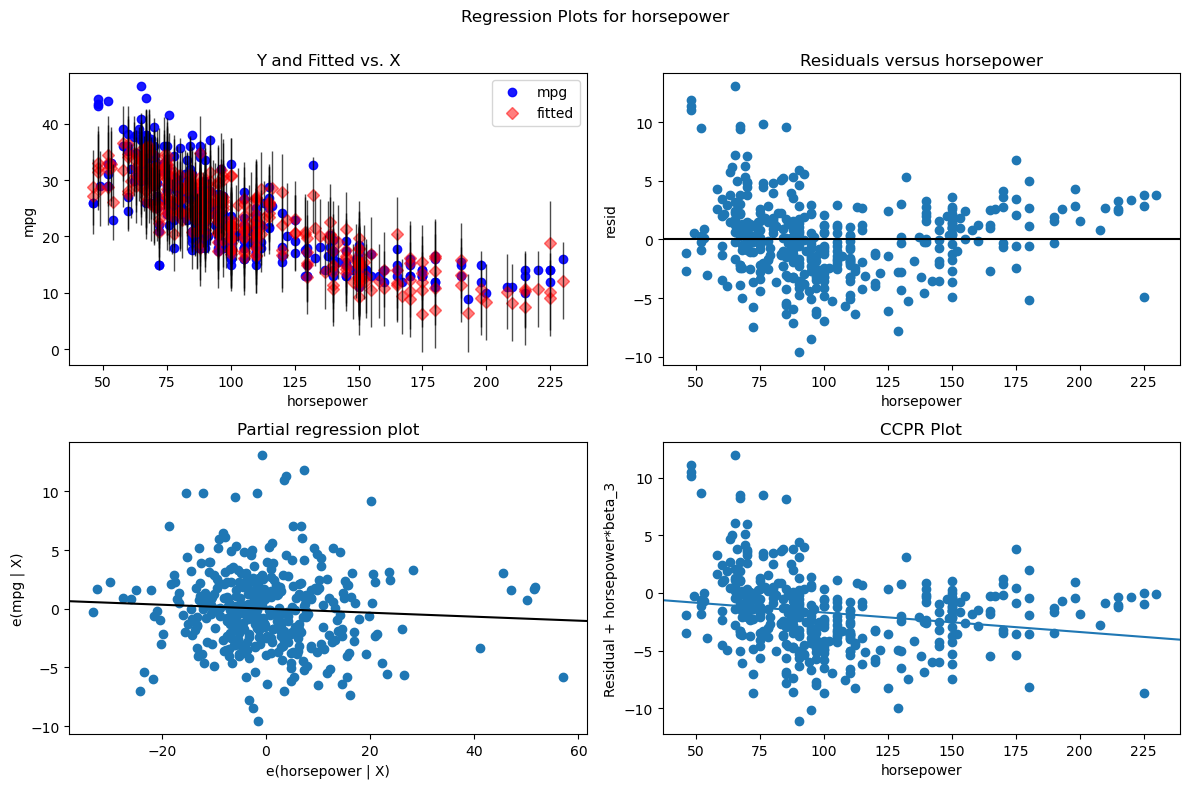

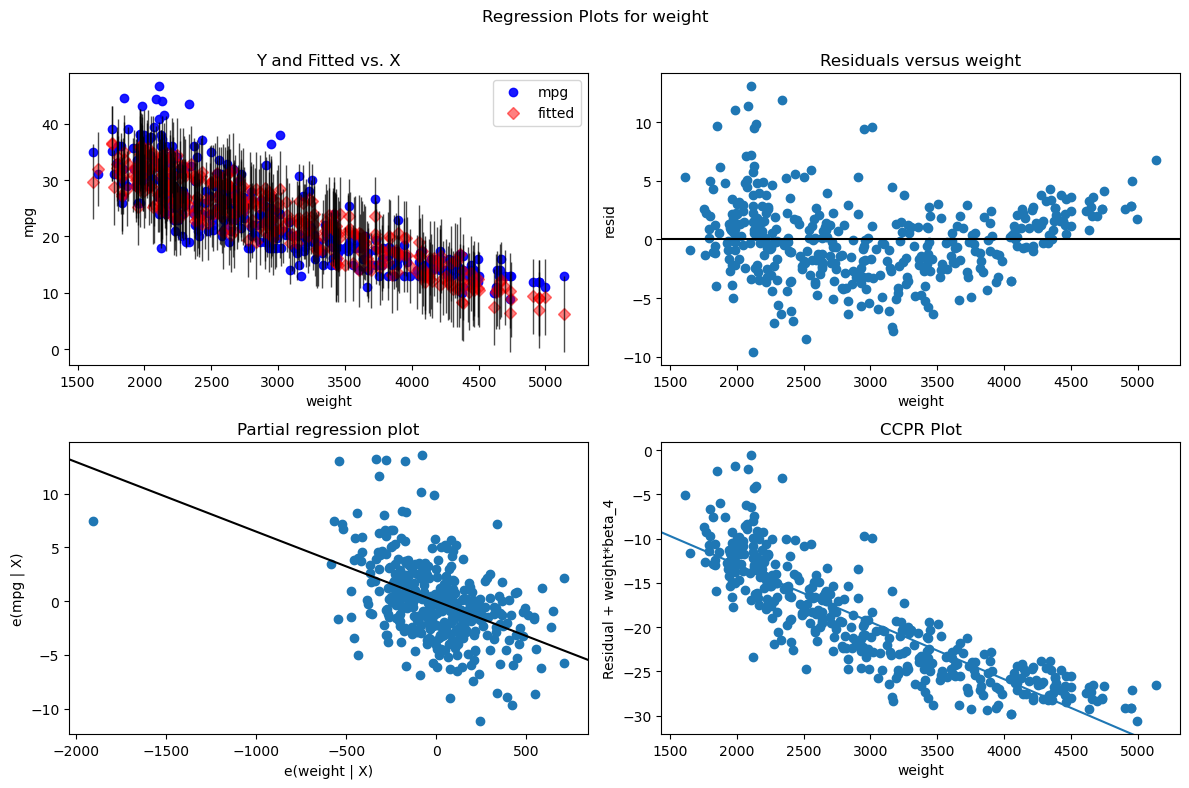

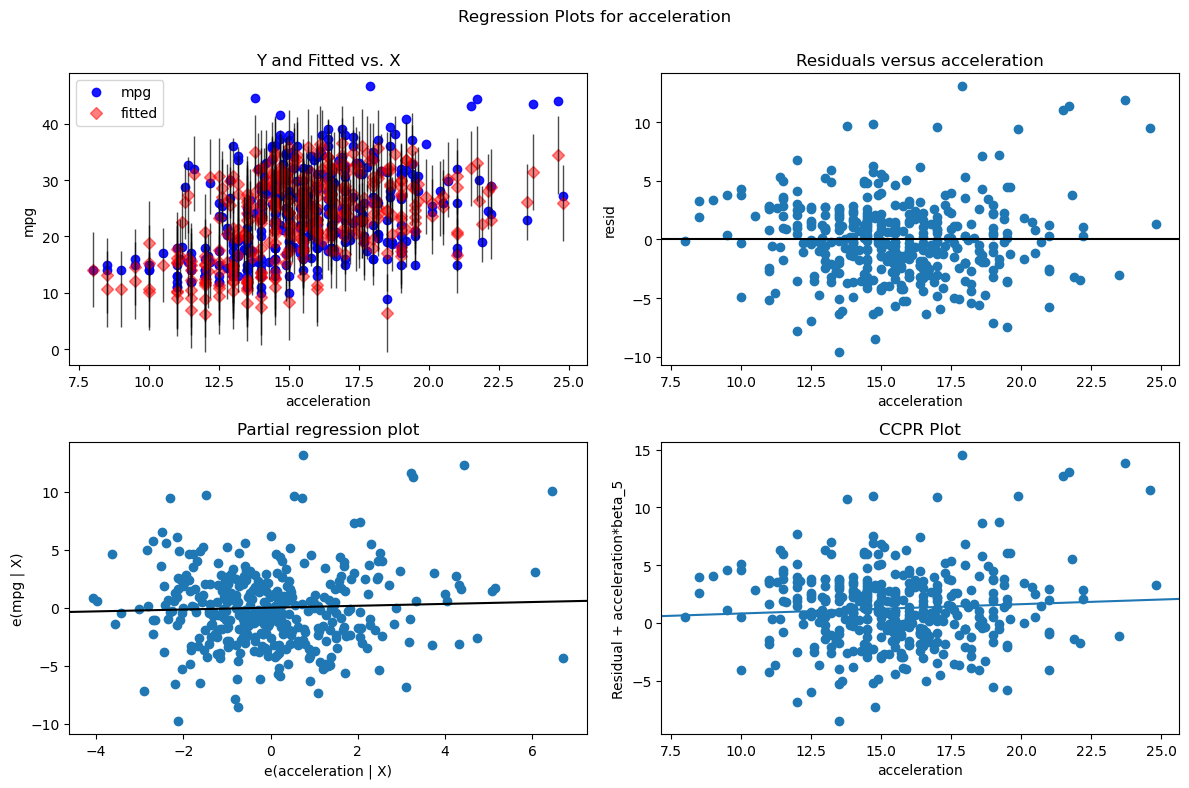

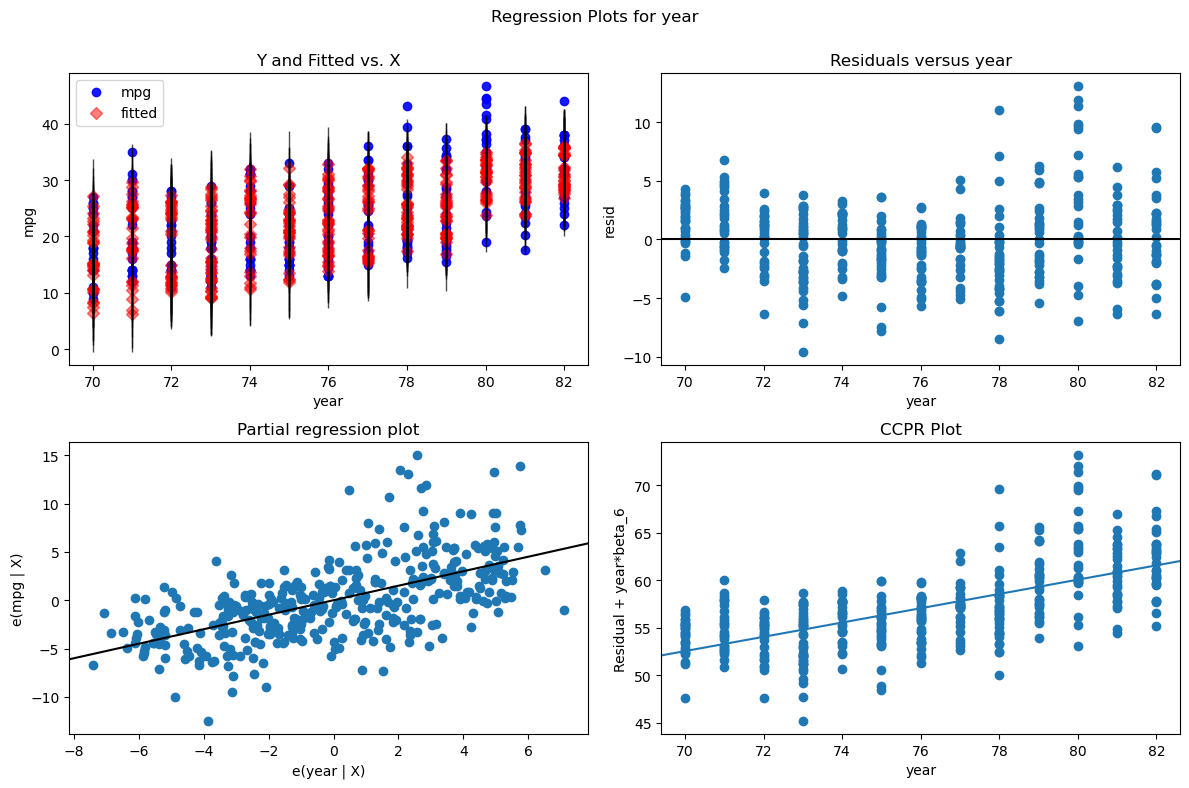

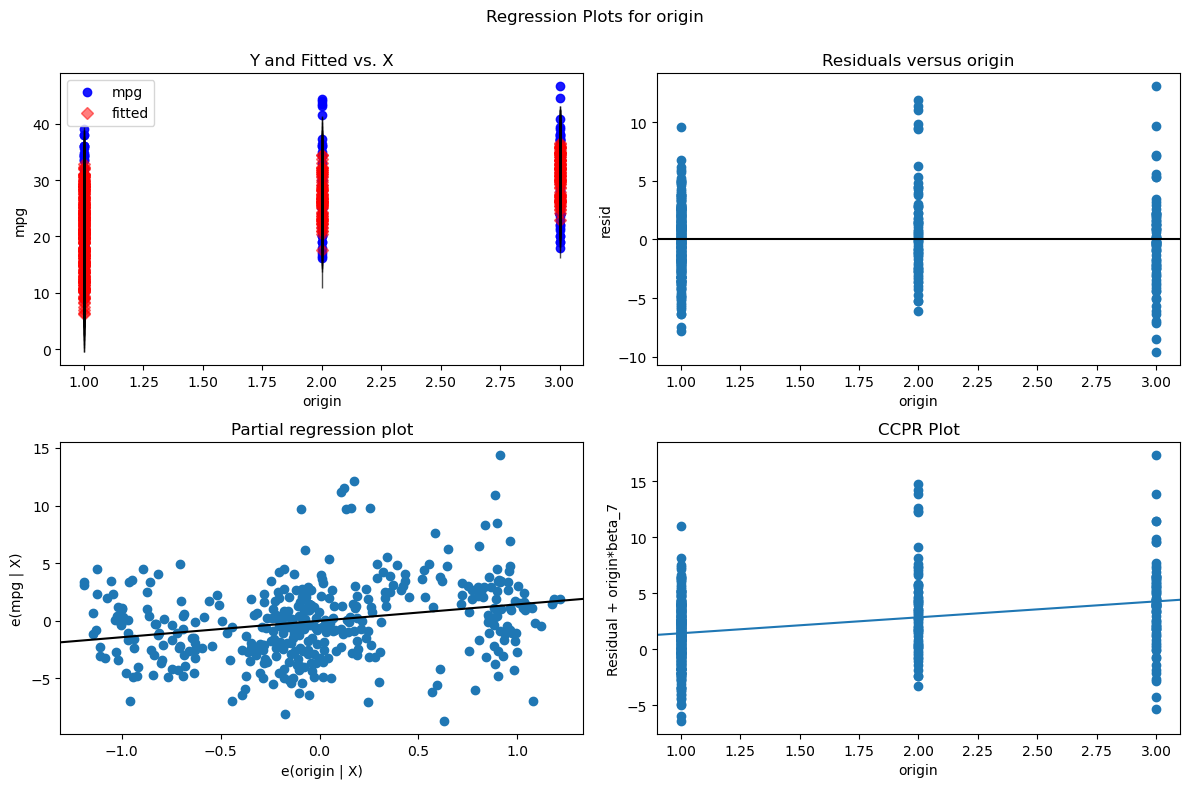

In [9]:
fig1 = plt.figure(figsize=(12,8))
fig1 = sm.graphics.plot_regress_exog(est_am, 'cylinders', fig=fig1)
fig2 = plt.figure(figsize=(12,8))
fig2 = sm.graphics.plot_regress_exog(est_am, 'displacement', fig=fig2)
fig3 = plt.figure(figsize=(12,8))
fig3 = sm.graphics.plot_regress_exog(est_am, 'horsepower', fig=fig3)
fig4 = plt.figure(figsize=(12,8))
fig4 = sm.graphics.plot_regress_exog(est_am, 'weight', fig=fig4)
fig5 = plt.figure(figsize=(12,8))
fig5 = sm.graphics.plot_regress_exog(est_am, 'acceleration', fig=fig5)
fig6 = plt.figure(figsize=(12,8))
fig6 = sm.graphics.plot_regress_exog(est_am, 'year', fig=fig6)
fig7 = plt.figure(figsize=(12,8))
fig7 = sm.graphics.plot_regress_exog(est_am, 'origin', fig=fig7)

## Exercise 5: Car Seats

This question should be answered using the Carseats data set

1. Fit a multiple regression model to predict Sales using Price, Urban, and US.

2. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!
<font color="red">A: The Price coefficient is negative so it implies as Price goes up, sales go down, which is similar with Urban but as a qualitative variable just means a sale is less likely. For US, the positive coefficient means that a sale is more likely.</font>

3. For which of the predictors can you reject the null hypothesis H0 : βj = 0? <font color="red">A: With a p-value below 0.05, Price and US can reject the null.</font>

4. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference. <font color="red">A: Neither model fits the data very well with an $R^2$ of 0.239. The AIC and BIC are only slightly lower in the second model but would indicate a better fit. P-value for Urban indicates that it is not an important feature to the model.

6. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [24]:
est_c2.conf_int() # second model confidence intervals

,0,1
const,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


In [10]:
# exercise 5

# first model
carseats = pd.read_csv('../data/carseats.csv')
carseats.Urban = carseats.Urban.map({'Yes': 1, 'No': 0})
carseats.US = carseats.US.map({'Yes': 1, 'No': 0})

X_c = sm.add_constant(carseats[['Price', 'Urban', 'US']])
y_c = carseats.Sales

est_c = sm.OLS(y_c, X_c).fit()

est_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           2.39e-23
Time:                        15:51:02   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# smaller model
X_c2 = sm.add_constant(carseats[['Price', 'US']])
y_c2 = carseats.Sales

est_c2 = sm.OLS(y_c2, X_c2).fit()

est_c2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           2.66e-24
Time:                        15:51:09   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""